In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kiva_loans_20181016.csv')
df.head()

,id,date,activity,sector,use,funded_amount,loan_amount,diff_funded_loan,status,country_code,country,currency,gender,borrower_genders,lender_count,term_in_months,repayment_interval,tags
0,653051,1/1/14,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",300,300,0,1,PK,Pakistan,PKR,female,female,12,12,irregular,NaN
1,653053,1/1/14,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,575,575,0,1,PK,Pakistan,PKR,group,"female, female",14,11,irregular,NaN
2,653068,1/1/14,Transportation,Transportation,To repair their old cycle-van and buy another ...,150,150,0,1,IN,India,INR,female,female,6,43,bullet,"user_favorite, user_favorite"
3,653063,1/1/14,Embroidery,Arts,to purchase an embroidery machine and a variet...,200,200,0,1,PK,Pakistan,PKR,female,female,8,11,irregular,NaN
4,653084,1/1/14,Milk Sales,Food,to purchase one buffalo.,400,400,0,1,PK,Pakistan,PKR,female,female,16,14,monthly,NaN


In [3]:
df.shape

(671205, 18)

In [4]:
df.status.value_counts()

1    622877
0     48328
Name: status, dtype: int64

In [5]:
df.dtypes

id                     int64
date                  object
activity              object
sector                object
use                   object
funded_amount          int64
loan_amount            int64
diff_funded_loan       int64
status                 int64
country_code          object
country               object
currency              object
gender                object
borrower_genders      object
lender_count           int64
term_in_months         int64
repayment_interval    object
tags                  object
dtype: object

In [6]:
df.isnull().sum()

id                         0
date                       0
activity                   0
sector                     0
use                     4232
funded_amount              0
loan_amount                0
diff_funded_loan           0
status                     0
country_code               8
country                    0
currency                   0
gender                  4221
borrower_genders        4221
lender_count               0
term_in_months             0
repayment_interval         0
tags                  171416
dtype: int64

In [7]:
df.activity.describe()

count      671205
unique        163
top       Farming
freq        72955
Name: activity, dtype: object

In [8]:
# Convert to datetime type
# df['date'] = pd.to_datetime(df['date'])

df['date'] = pd.to_datetime(df['date'])
df['newdate'] = [d.date() for d in df['date']]

In [9]:
# Convert to String and then to int

df['year'] = df['newdate'].apply(lambda date: str(date).split('-')[0]).astype(str).astype(int)
df['month'] = df['newdate'].apply(lambda date: str(date).split('-')[1]).astype(str).astype(int)
df['day_of_month'] = df['newdate'].apply(lambda date: str(date).split('-')[2]).astype(str).astype(int)
df['weekday'] = df['date'].dt.day_name()

In [10]:
df.head(2)

,id,date,activity,sector,use,funded_amount,loan_amount,diff_funded_loan,status,country_code,...,borrower_genders,lender_count,term_in_months,repayment_interval,tags,newdate,year,month,day_of_month,weekday
0,653051,2014-01-01,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",300,300,0,1,PK,...,female,12,12,irregular,NaN,2014-01-01,2014,1,1,Wednesday
1,653053,2014-01-01,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,575,575,0,1,PK,...,"female, female",14,11,irregular,NaN,2014-01-01,2014,1,1,Wednesday


In [11]:
days = {'Monday':'Mon','Tuesday':'Tue','Wednesday':'Wed','Thursday':'Thu','Friday':'Fri','Saturday':'Sat','Sunday':'Sun'}
df['weekday_short'] = df['weekday'].apply(lambda x: days[x])

In [12]:
df.head(2)

,id,date,activity,sector,use,funded_amount,loan_amount,diff_funded_loan,status,country_code,...,lender_count,term_in_months,repayment_interval,tags,newdate,year,month,day_of_month,weekday,weekday_short
0,653051,2014-01-01,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",300,300,0,1,PK,...,12,12,irregular,NaN,2014-01-01,2014,1,1,Wednesday,Wed
1,653053,2014-01-01,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,575,575,0,1,PK,...,14,11,irregular,NaN,2014-01-01,2014,1,1,Wednesday,Wed


In [13]:
df.year.value_counts()

2016    197236
2015    181833
2014    174234
2017    117902
Name: year, dtype: int64

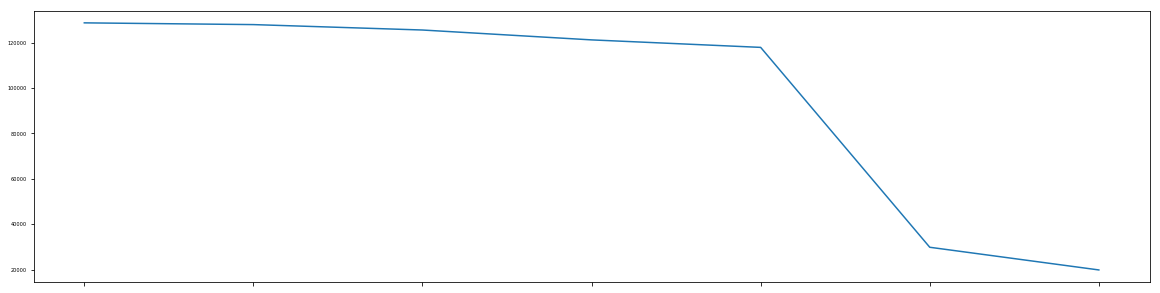

In [14]:
# Month(s) with more saturday is better to launch a project?
plt.tick_params(axis='both', which='major', labelsize=5)
df.weekday_short.value_counts().plot(figsize=(20, 5))

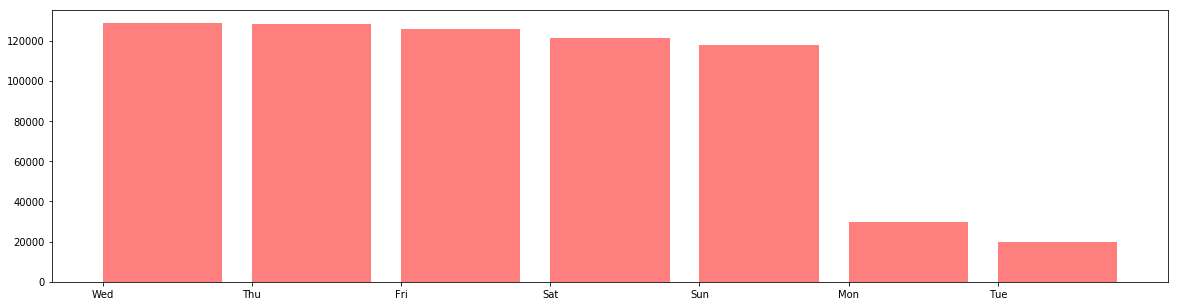

In [15]:
# Set x axis and tick locations
x_axis = df.weekday_short.unique()
y_axis = df.weekday_short.value_counts()
plt.figure(figsize=(20,5))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="edge")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [16]:
df.country.unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

In [17]:
def classifier(row):
    if row.country in ["Australia", "New Zealand", "Norfolk Island"]:
        return "Australia & New Zealand"
    elif row.country in ["Anguilla", "Antigua and Barbuda", "Aruba", "Bahamas", "Barbados", "British Virgin Islands", "Cayman Islands", "Cuba", "Dominica", "Dominican Republic", "Grenada", "Guadeloupe", "Haiti", "Jamaica", "Martinique", "Montserrat", "Netherlands Antilles", "Puerto Rico", "Saint Barthélemy", "Saint Kitts and Nevis", "Saint Lucia", "Saint Martin", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "Turks and Caicos Islands", "U.S. Virgin Islands"]:
        return "Caribbean"
    elif row.country in ["Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama"]:
        return "Central America"
    elif row.country in ["Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan", "Uzbekistan"]:
        return  "Central Asia"
    elif row.country in ["Armenia", "Azerbaijan", "Belarus", "Georgia", "Kazakhstan", "Kyrgyzstan", "Moldova", "Russia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"]:
        return "Commonwealth of Independent States"
    elif row.country in ["Burundi", "Comoros", "Djibouti", "Eritrea", "Ethiopia", "Kenya", "Madagascar", "Malawi", "Mauritius", "Mayotte", "Mozambique", "Rwanda", "Réunion", "Seychelles", "Somalia", "Tanzania", "Uganda", "Zambia", "Zimbabwe"]:
        return "Eastern Africa"
    elif row.country in ["China", "Hong Kong SAR China", "Japan", "Macau SAR China", "Mongolia", "North Korea", "South Korea", "Taiwan"]:
        return "Eastern Asia"
    elif row.country in ["Belarus", "Bulgaria", "Czech Republic", "Hungary", "Moldova", "Poland", "Romania", "Russia", "Slovakia", "Ukraine", 
                        "Union of Soviet Socialist Republics"]:
        return "Eastern Europe"
    elif row.country in ["Fiji", "New Caledonia", "Papua New Guinea", "Solomon Islands", "Vanuatu", "Micronesian Region", "Guam", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "Northern Mariana Islands", "Palau"]:
        return "Melanesia"
    elif row.country in ["Angola", "Cameroon", "Central African Republic", "Chad", "Congo", "Congo - Kinshasa", "Equatorial Guinea", "Gabon", "São Tomé and Príncipe"]:
        return "Middle Africa"
    elif row.country in ["Algeria", "Egypt", "Libya", "Morocco", "South Sudan", "Tunisia", "Western Sahara"]:
        return "Northern Africa"
    elif row.country in ["Bermuda", "Canada", "Greenland", "Saint Pierre and Miquelon", "United States"]:
        return "Northern America"
    elif row.country in ["Denmark", "Estonia", "Faroe Islands", "Finland", "Guernsey", "Iceland", "Ireland", "Isle of Man", "Jersey", "Latvia", "Lithuania", "Norway", "Svalbard and Jan Mayen", "Sweden", "United Kingdom", "Åland Islands"]:
        return "Northern Europe" 
    elif row.country in ["American Samoa", "Cook Islands", "French Polynesia", "Niue", "Pitcairn Islands", "Samoa", "Tokelau", "Tonga", "Tuvalu", "Wallis and Futuna"]:
        return "Polynesia"
    elif row.country in ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Falkland Islands", "French Guiana", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]:
        return "South America"
    elif row.country in ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar (Burma)", "Philippines", "Singapore", "Thailand", "Timor-Leste", "Vietnam", "Southern Africa", "Botswana", "Lesotho", "Namibia", "South Africa", "Swaziland"]:
        return "South-Eastern Asia"
    elif row.country in ["Afghanistan", "Bangladesh", "Bhutan", "India", "Iran", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]:
        return "Southern Asia"
    elif row.country in ["Albania", "Andorra", "Bosnia and Herzegovina", "Croatia", "Gibraltar", "Greece", "Italy", "Macedonia", "Malta", "Montenegro", "Portugal", "San Marino", "Serbia", "Serbia and Montenegro", "Slovenia", "Spain", "Vatican City"]:
        return  "Southern Europe" 
    elif row.country in ["Benin", "Burkina Faso", "Cape Verde", "Côte d Ivoire", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania", "Niger", "Nigeria", "Saint Helena", "Senegal", "Sierra Leone", "Togo"]:
        return "Western Africa" 
    elif row.country in ["Armenia", "Azerbaijan", "Bahrain", "Cyprus", "Georgia", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Neutral Zone", "Oman", "Palestinian Territories", "People's Democratic Republic of Yemen", "Qatar", "Saudi Arabia", "Syria", "Turkey", "United Arab Emirates", "Yemen"]:
        return "Middle East - Western Asia"
    elif row.country in ["Austria", "Belgium", "East Germany", "France", "Germany", "Liechtenstein", "Luxembourg", "Metropolitan France", "Monaco", "Netherlands", "Switzerland"]:
        return "Western Europe"
    else:
        return "Others"   
df["sub_region"] = df.apply(classifier, axis=1)

In [19]:
df.sub_region.value_counts()

South-Eastern Asia                    217882
Eastern Africa                        122777
South America                          78975
Central America                        73143
Western Africa                         42222
Southern Asia                          38815
Central Asia                           25354
Middle East - Western Asia             18158
Commonwealth of Independent States     14296
Others                                 14148
Polynesia                               7396
Northern America                        6093
Caribbean                               4198
Middle Africa                           2358
Southern Europe                         1934
Northern Africa                         1799
Eastern Asia                            1098
Melanesia                                559
Name: sub_region, dtype: int64

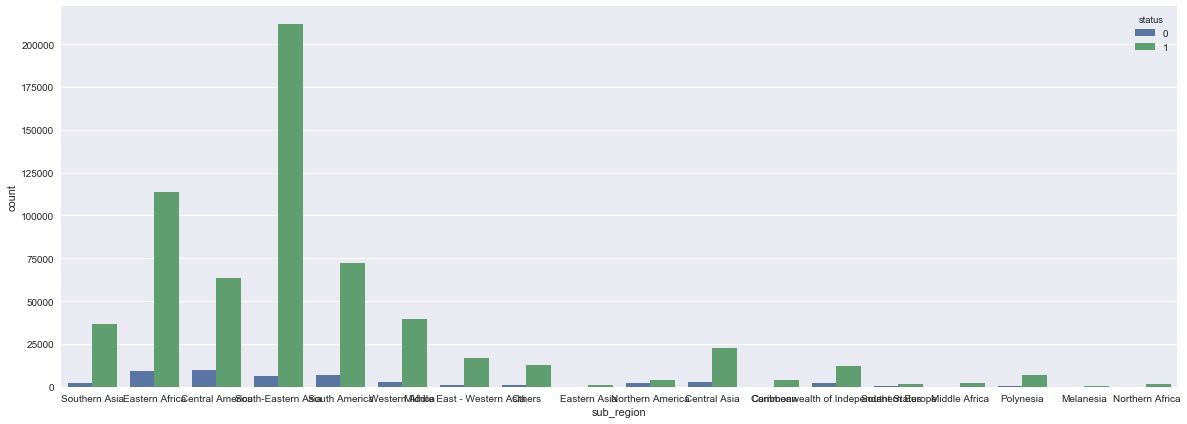

In [26]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(x='sub_region',data=df,hue='status')

In [27]:
df.status.value_counts(normalize = True)

1    0.927998
0    0.072002
Name: status, dtype: float64

In [28]:
df.funded_amount.mean()

785.9950611214159

Text(0.5,0,'Sub_Region')

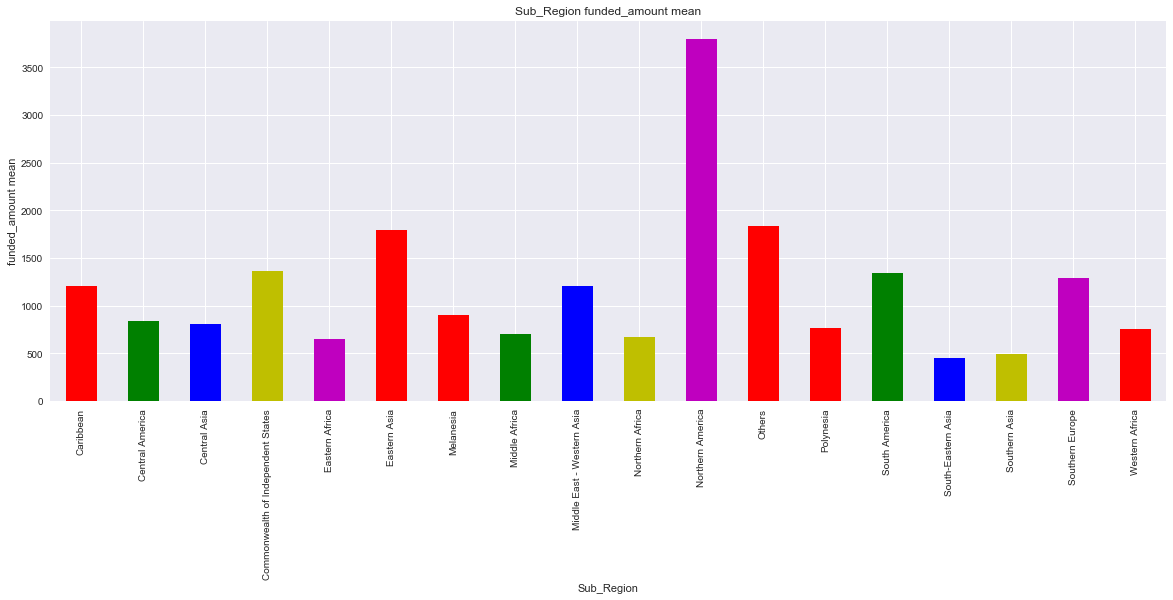

In [29]:
color = ['r', 'g', 'b', 'y', 'm']
df.groupby('sub_region').funded_amount.mean().sort_index().plot(kind = 'bar', color = color)
plt.title('Sub_Region funded_amount mean')
plt.ylabel('funded_amount mean')
plt.xlabel('Sub_Region')

In [30]:
df[df['funded_amount']>50000].shape

# only 1 project had funded amount over $50,000.

(1, 25)

In [31]:
df[df['funded_amount']>10000].shape

# only 170 projects had funded amount over $10,000.

(170, 25)

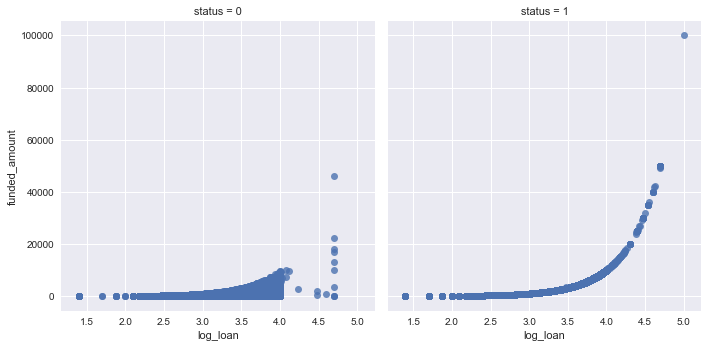

In [32]:
df['log_loan'] = np.log10(df['loan_amount'])
sns.lmplot(x = 'log_loan', y = 'funded_amount', col ='status', data = df, fit_reg = False)

Text(0.5,1,'Successful Kickstarters have on average lower loan requirement')

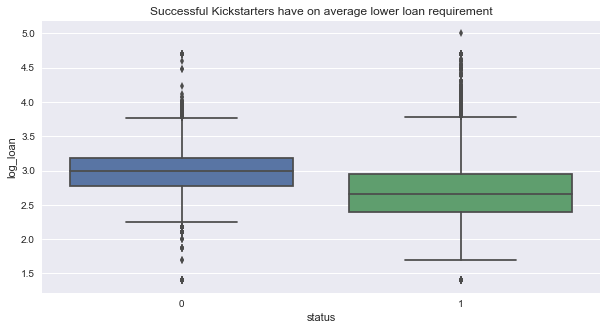

In [33]:
plt.figure(figsize = (10,5))
sns.boxplot(x ='status', y = 'log_loan', data = df)
plt.title('Successful Kickstarters have on average lower loan requirement')

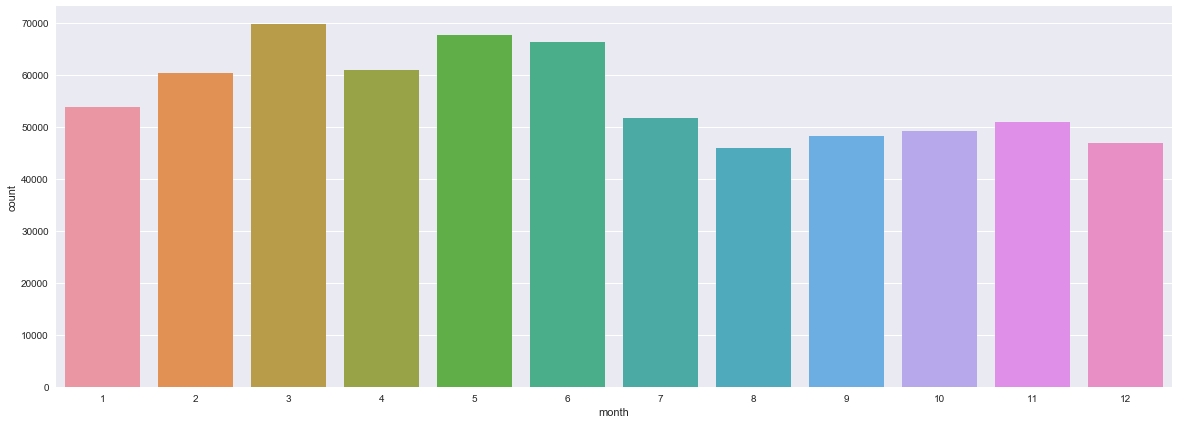

In [34]:
# Number of Projects lunch each month

sns.countplot(x='month',data=df)

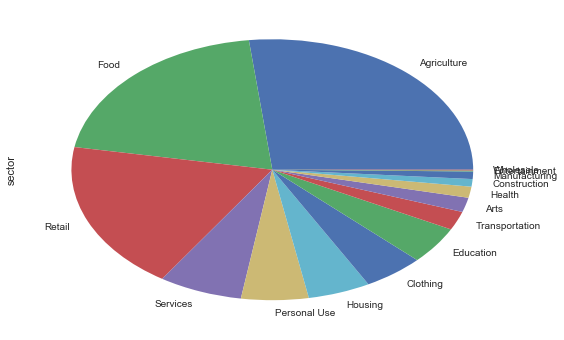

In [35]:
df.sector.value_counts(normalize = True).plot(kind = 'pie', figsize=(9, 6))

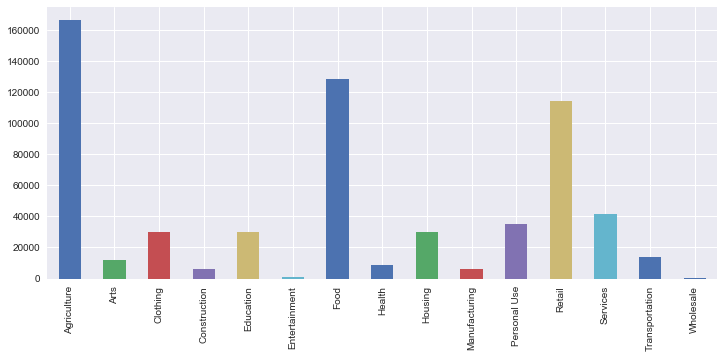

In [36]:
# Successful loans by sector
df[df['status']== 1]['sector'].value_counts().sort_index().plot(kind = 'bar', figsize=(12, 5))

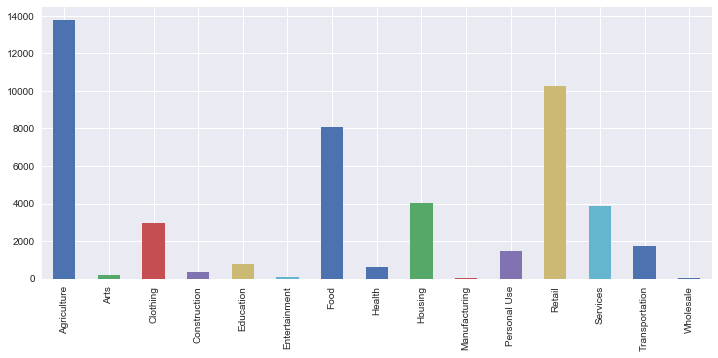

In [37]:
# Failed loans by sector
df[df['status']== 0]['sector'].value_counts().sort_index().plot(kind = 'bar', figsize=(12, 5))

In [38]:
df.groupby('sector').status.mean()

sector
Agriculture       0.923456
Arts              0.983167
Clothing          0.908741
Construction      0.947033
Education         0.974914
Entertainment     0.873494
Food              0.940889
Health            0.933427
Housing           0.881266
Manufacturing     0.992590
Personal Use      0.959819
Retail            0.917418
Services          0.913802
Transportation    0.888968
Wholesale         0.966877
Name: status, dtype: float64

In [39]:
# Loans by country
df.groupby(['country']).status.count()

country
Afghanistan                                  2
Albania                                   1934
Armenia                                   8631
Azerbaijan                                1945
Belize                                     125
Benin                                      497
Bhutan                                       2
Bolivia                                   8806
Brazil                                     284
Burkina Faso                              2460
Burundi                                    880
Cambodia                                 34836
Cameroon                                  2230
Chile                                       10
China                                      134
Colombia                                 21995
Congo                                      128
Costa Rica                                1561
Cote D'Ivoire                                1
Dominican Republic                         496
Ecuador                                  13521
Egypt

In [40]:
# Loans by country and sector
df.groupby(['country', 'sector']).status.count()

country      sector        
Afghanistan  Arts                 2
Albania      Agriculture        719
             Arts                 5
             Clothing            87
             Construction        30
             Education           93
             Entertainment        5
             Food                79
             Health             271
             Housing            378
             Manufacturing       21
             Personal Use        89
             Retail              40
             Services            70
             Transportation      40
             Wholesale            7
Armenia      Agriculture       4630
             Arts                49
             Clothing           263
             Construction       144
             Education         1293
             Entertainment       13
             Food               361
             Health             748
             Housing             45
             Manufacturing       75
             Personal Use       162


In [41]:
# Success percentage by continent
df.groupby(['sub_region', 'sector']).status.mean().sort_index()

sub_region       sector        
Caribbean        Agriculture       0.948529
                 Arts              0.864865
                 Clothing          0.981283
                 Construction      0.940000
                 Education         0.935135
                 Entertainment     0.800000
                 Food              0.979866
                 Health            0.958333
                 Housing           1.000000
                 Manufacturing     0.892857
                 Personal Use      1.000000
                 Retail            0.982003
                 Services          0.953488
                 Transportation    1.000000
                 Wholesale         0.973684
Central America  Agriculture       0.869626
                 Arts              0.993264
                 Clothing          0.848978
                 Construction      0.962373
                 Education         0.972561
                 Entertainment     1.000000
                 Food              0.887045


In [1]:
df1 = df[['loan_amount', 'status', 'sector','country','term_in_months', 'repayment_interval']]
df1.head()

NameError: name 'df' is not defined

In [ ]:
# not really useful since it is not a regression analysis but wanted to see if there was any correlation i was missing
# sns.pairplot(df1,hue='result',palette='bwr')